In [ ]:
! pip install vnstock

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.0 MB/s eta 0:00:00


In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error,r2_score
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
warnings.filterwarnings('ignore')

In [ ]:
from vnstock import *
df =  stock_historical_data(symbol='VCB', 
                            start_date="2000-01-01", 
                            end_date='2023-03-18')

In [ ]:
print(df)

         Open     High      Low    Close   Volume TradingDate
0     16245.0  16245.0  16245.0  16245.0   294070  2009-06-30
1     17057.0  17058.0  16110.0  16381.0  6248390  2009-07-01
2     16110.0  16245.0  15568.0  15704.0  1515670  2009-07-02
3     15298.0  15433.0  15162.0  15162.0   899720  2009-07-03
4     15839.0  15839.0  15162.0  15839.0  1571740  2009-07-06
...       ...      ...      ...      ...      ...         ...
3421  92000.0  92000.0  90800.0  91500.0   759814  2023-03-13
3422  91000.0  91200.0  90500.0  91000.0   864241  2023-03-14
3423  91600.0  92000.0  91100.0  91400.0   808217  2023-03-15
3424  91000.0  92000.0  89500.0  91000.0   806313  2023-03-16
3425  91000.0  91100.0  89000.0  89000.0  2272490  2023-03-17

[3426 rows x 6 columns]


In [ ]:
df=df.rename(columns={"TradingDate":"Date"}).reset_index(drop=True)
df

,Open,High,Low,Close,Volume,Date
0,16245.0,16245.0,16245.0,16245.0,294070,2009-06-30
1,17057.0,17058.0,16110.0,16381.0,6248390,2009-07-01
2,16110.0,16245.0,15568.0,15704.0,1515670,2009-07-02
3,15298.0,15433.0,15162.0,15162.0,899720,2009-07-03
4,15839.0,15839.0,15162.0,15839.0,1571740,2009-07-06
...,...,...,...,...,...,...
3421,92000.0,92000.0,90800.0,91500.0,759814,2023-03-13
3422,91000.0,91200.0,90500.0,91000.0,864241,2023-03-14
3423,91600.0,92000.0,91100.0,91400.0,808217,2023-03-15
3424,91000.0,92000.0,89500.0,91000.0,806313,2023-03-16


In [ ]:
df.to_csv('stockdata.csv',index=False)


In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stock_data = pd.read_csv('stockdata.csv', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
stock_data

ValueError: ignored

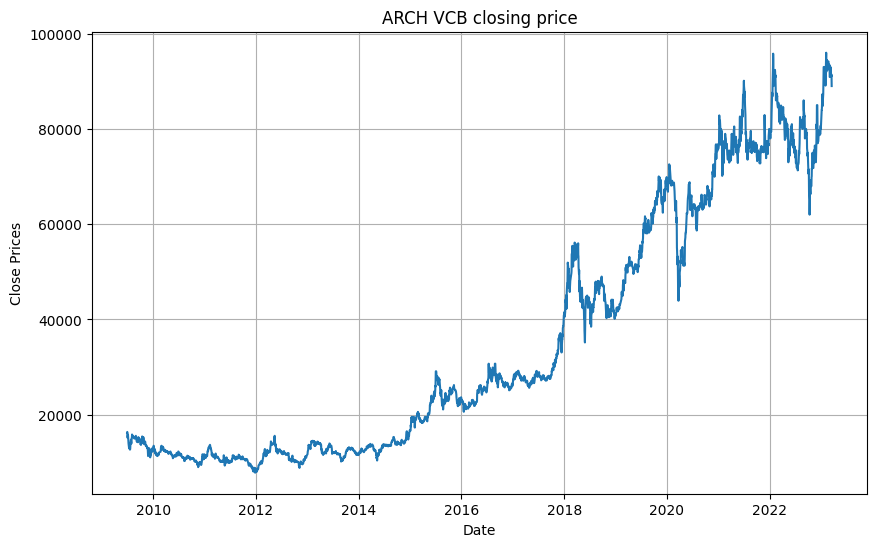

In [ ]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('ARCH VCB closing price')
plt.show()

<Axes: ylabel='Density'>

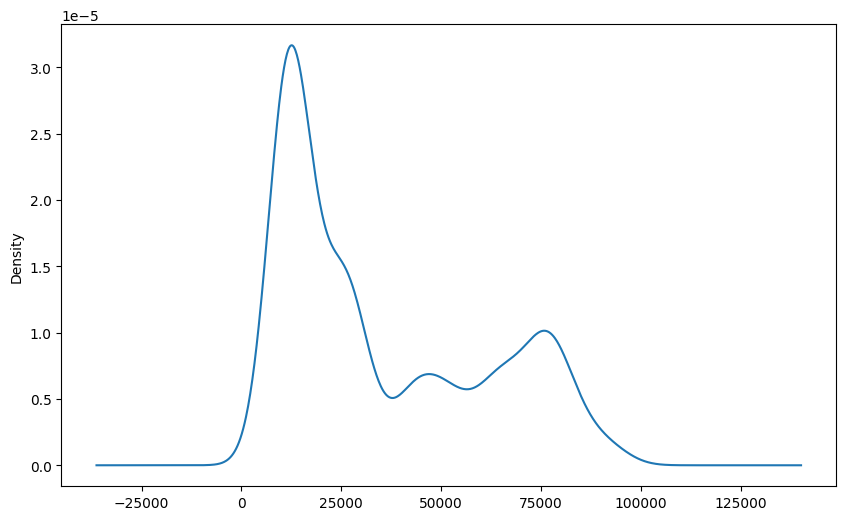

In [ ]:
#Distribution of the dataset
df_close = stock_data['Close']
df_close.plot(kind='kde')

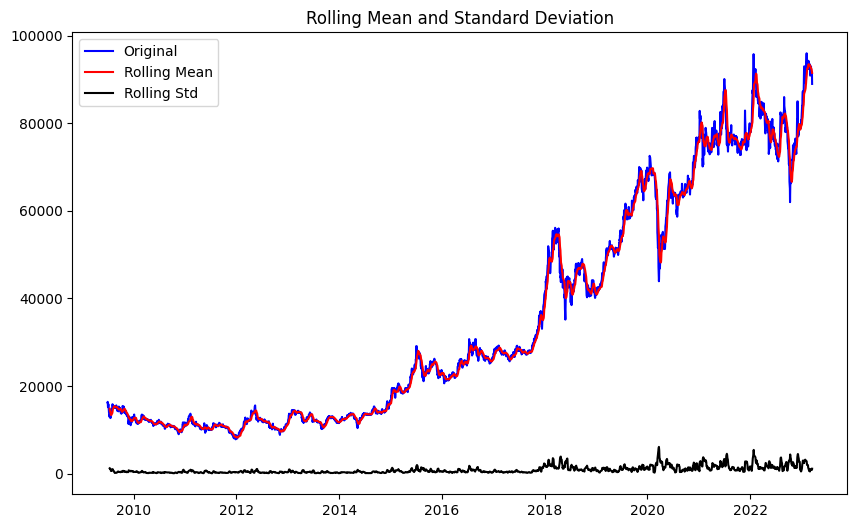

Results of dickey fuller test
Test Statistics                   0.079063
p-value                           0.964602
No. of lags used                 11.000000
Number of observations used    3414.000000
critical value (1%)              -3.432267
critical value (5%)              -2.862387
critical value (10%)             -2.567221
dtype: float64


In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

<Figure size 1000x600 with 0 Axes>

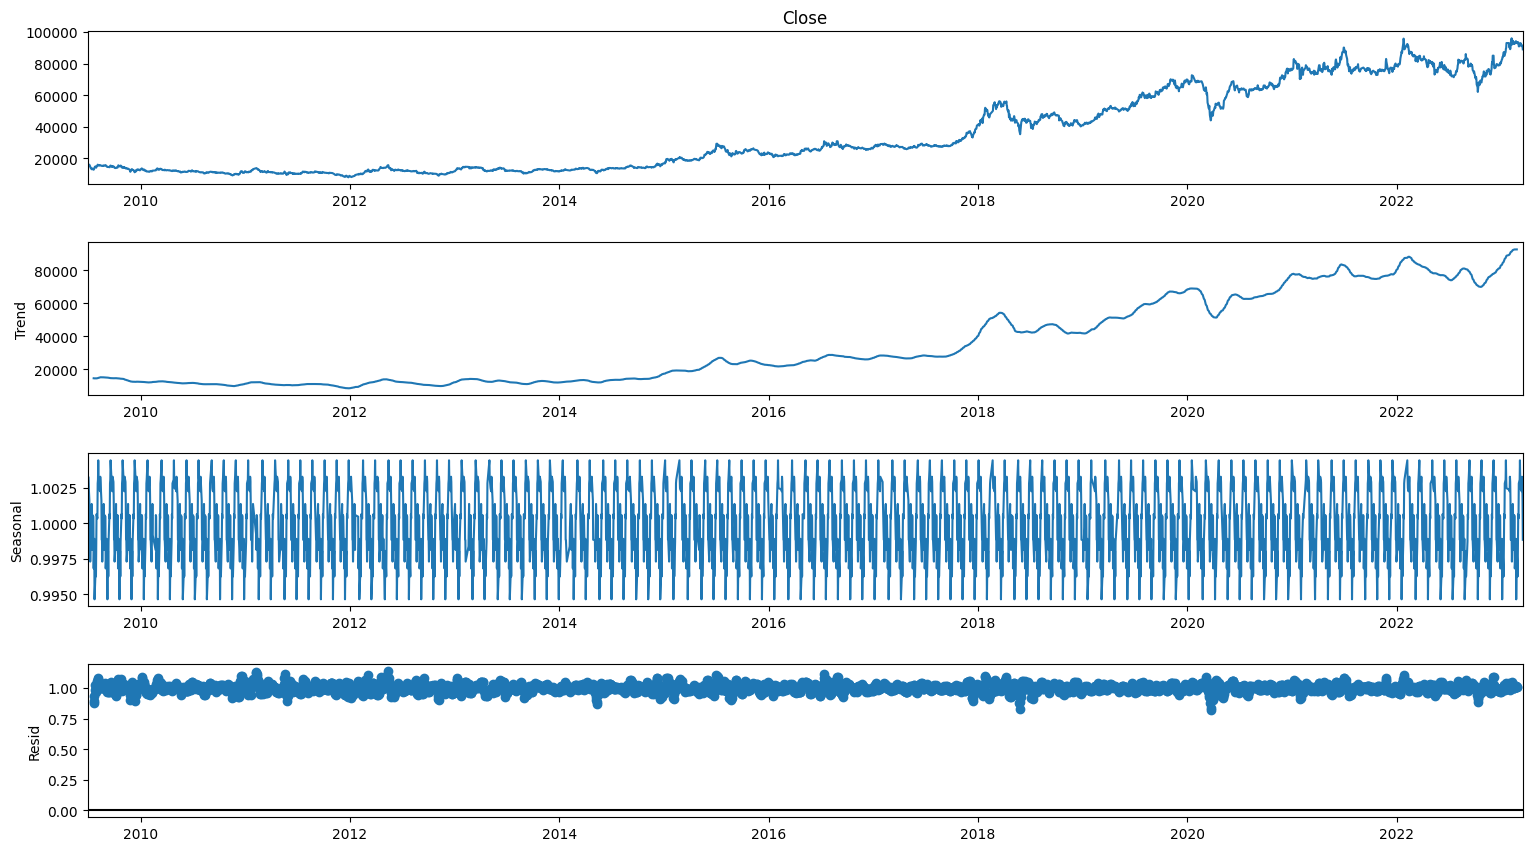

In [ ]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df_close, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
warnings.filterwarnings('ignore')

In [ ]:
df

,Open,High,Low,Close,Volume,Date
0,16245.0,16245.0,16245.0,16245.0,294070,2009-06-30
1,17057.0,17058.0,16110.0,16381.0,6248390,2009-07-01
2,16110.0,16245.0,15568.0,15704.0,1515670,2009-07-02
3,15298.0,15433.0,15162.0,15162.0,899720,2009-07-03
4,15839.0,15839.0,15162.0,15839.0,1571740,2009-07-06
...,...,...,...,...,...,...
3421,92000.0,92000.0,90800.0,91500.0,759814,2023-03-13
3422,91000.0,91200.0,90500.0,91000.0,864241,2023-03-14
3423,91600.0,92000.0,91100.0,91400.0,808217,2023-03-15
3424,91000.0,92000.0,89500.0,91000.0,806313,2023-03-16


In [ ]:
Close =df ["Close"]
Close

0       16245.0
1       16381.0
2       15704.0
3       15162.0
4       15839.0
         ...   
3421    91500.0
3422    91000.0
3423    91400.0
3424    91000.0
3425    89000.0
Name: Close, Length: 3426, dtype: float64

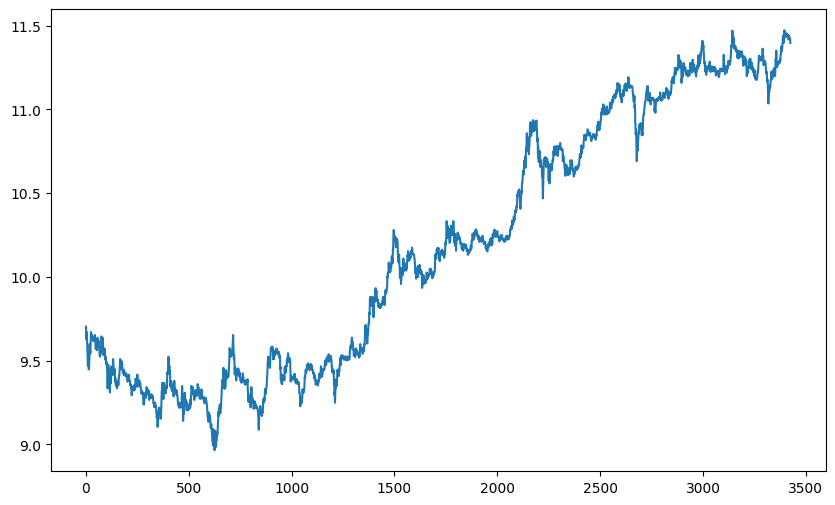

In [ ]:

lnClose=np.log(Close)
lnClose
plt.plot(lnClose)
plt.show()

In [ ]:

lnClose_diff=lnClose-lnClose.shift()
diff=lnClose_diff.dropna()


In [ ]:
price_matrix=lnClose.values

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17178.253, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17181.147, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17181.240, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17178.077, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17179.265, Time=0.95 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-17179.468, Time=3.95 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-17179.065, Time=8.87 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-17181.222, Time=0.33 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 15.826 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3426
Model:               SARIMAX(0, 1, 1)   Log Likelihood                8593.620
Date:                Tue, 02 May 2023   AIC                         -17181.240
Time:              

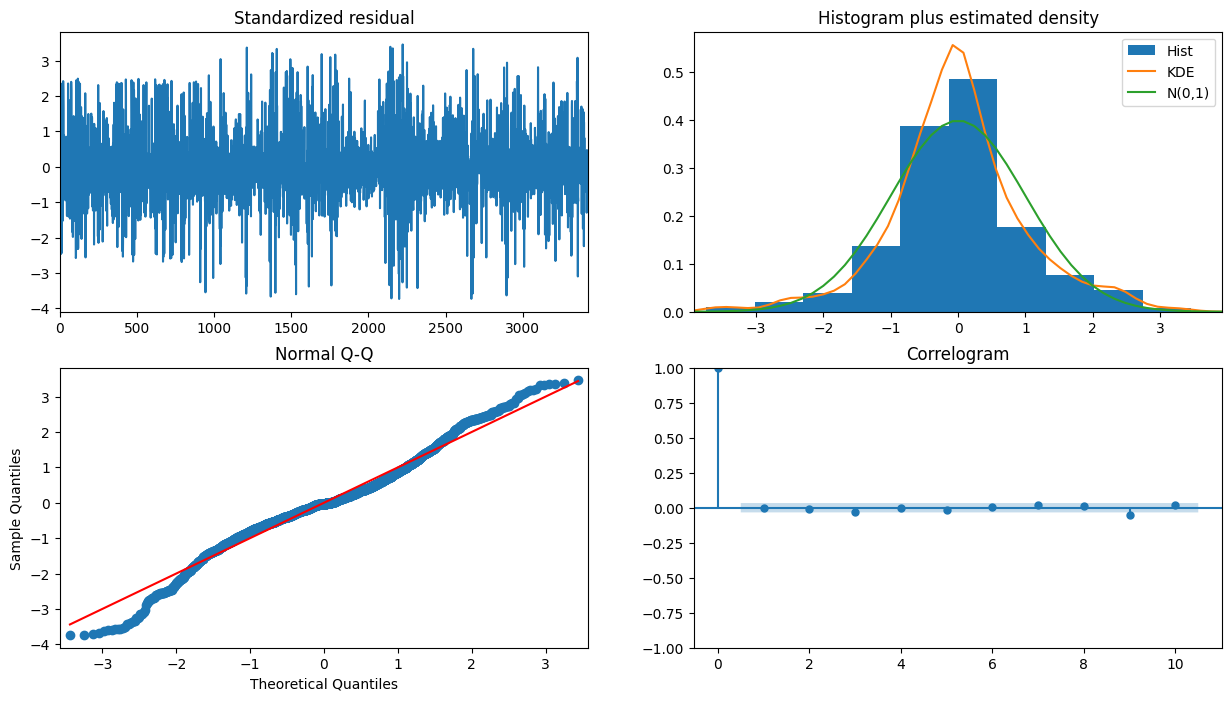

In [ ]:
model_autoARIMA = auto_arima(price_matrix, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:

model = ARIMA(price_matrix, order=(0,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3426
Model:                 ARIMA(0, 1, 1)   Log Likelihood                8592.611
Date:                Tue, 02 May 2023   AIC                         -17181.222
Time:                        06:20:01   BIC                         -17168.944
Sample:                             0   HQIC                        -17176.835
                               - 3426                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0377      0.013      2.858      0.004       0.012       0.064
sigma2         0.0004   7.19e-06     53.901      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [ ]:

#predictions=model_fit.predict(3269, 3425, typ='levels')
predictions=model_fit.predict(3269, 3425, typ='levels')
predictions
predictionsadjusted=np.exp(predictions)
predictionsadjusted


array([74677.11837824, 77088.92901067, 78969.069982  , 79520.07601252,
       82614.44621718, 81976.93614928, 82000.8692132 , 80755.0945945 ,
       80490.40335855, 81538.28996281, 81602.3262553 , 81807.45804794,
       81488.43706028, 81500.43574392, 81499.98358045, 80877.47812592,
       79967.12186395, 80208.78850323, 82068.27250352, 81997.42848304,
       82518.99788089, 82499.28421205, 86134.7785979 , 83920.60053299,
       82550.64581604, 82705.63320751, 79899.79593802, 77929.30232089,
       78832.99893269, 79110.07872934, 78580.84377188, 78289.43696026,
       79234.51789745, 80028.98884639, 78754.06036575, 79216.85306595,
       78888.08523049, 77966.73156316, 75823.20224333, 74969.15564109,
       74274.90214923, 75027.46092109, 73961.55977772, 73171.45690977,
       70504.89003973, 71330.13581453, 71506.40868291, 70047.54830798,
       66577.03531943, 65044.98798086, 61888.08925888, 64080.97432501,
       66592.91722734, 68157.45155854, 66231.00639886, 67755.98677806,
      

In [ ]:
price_matrix_arr=np.exp(price_matrix[3269: 3426])
price_matrix_arr

array([77000., 78900., 79500., 82500., 82000., 82000., 80800., 80500.,
       81500., 81600., 81800., 81500., 81500., 81500., 80900., 80000.,
       80200., 82000., 82000., 82500., 82500., 86000., 84000., 82600.,
       82700., 80000., 78000., 78800., 79100., 78600., 78300., 79200.,
       80000., 78800., 79200., 78900., 78000., 75900., 75000., 74300.,
       75000., 74000., 73200., 70600., 71300., 71500., 70100., 66700.,
       65100., 62000., 64000., 66500., 68100., 66300., 67700., 67900.,
       69200., 68000., 68000., 69900., 70000., 71700., 71600., 73500.,
       75000., 73600., 73000., 71800., 71800., 72600., 74000., 72800.,
       75500., 75100., 75000., 75100., 76500., 76500., 75000., 73500.,
       73500., 73000., 73100., 76700., 79800., 81000., 80000., 85000.,
       85000., 80000., 78500., 77000., 77300., 77400., 78200., 78800.,
       79500., 79700., 79200., 79000., 78700., 79300., 79100., 78900.,
       79100., 80000., 80700., 80000., 82600., 82800., 84000., 84000.,
      

In [ ]:
# chỉ số scoring cho kết quả hồi quy
print('Test R2 Score: ', r2_score(price_matrix_arr, predictionsadjusted))
print('Test MAE: ', mean_absolute_error(price_matrix_arr, predictionsadjusted))
print('Test mape: ', mean_absolute_percentage_error(price_matrix_arr, predictionsadjusted))
print('Test rmse: ', mean_squared_error(price_matrix_arr, predictionsadjusted))


Test R2 Score:  0.9644831887804974
Test MAE:  1119.6144571322825
Test mape:  0.01398969324476493
Test rmse:  2299384.582780161
